Task 1: Feature Engineering

1.1: Identify 5 Unique features from this data set
    a. Tid
    b. Linjenavn
    c. Fylke
    d. Område
    e. Kommune

1.2: Apply feature engineering on them in Python

In [19]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [20]:
#First i save the url as a variable
url ='https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
#Reading the csv from the URL given above and telling python that the separator/delimiter is ';'
df = pd.read_csv(url, sep=';')

#Showing the table (I tried importing everything (head(6001)), but it realy f*ked my computer)
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [21]:
#Converting to binary and showing it
df_bin = pd.get_dummies(df, drop_first=True)
df_bin.head()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,TurId_10001-2020-06-03T17:50:00+02:00,TurId_10001-2020-06-04T11:10:00+02:00,TurId_10001-2020-06-10T15:10:00+02:00,TurId_10001-2020-06-13T05:14:00+02:00,TurId_10001-2020-06-23T17:50:00+02:00,TurId_10001-2020-06-26T14:50:00+02:00,TurId_10001-2020-06-29T07:10:00+02:00,...,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:25:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:29:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:31:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:35:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:38:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:40:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:43:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:44:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:46:00,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra_25:48:00
0,0,112,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,112,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,112,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,112,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,112,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Dropping the columns that I think won't make any sense in binary
df_bin = df.drop(["TurId","Fylke","Linjetype","Dato","Område","Kommune","Holdeplass_Fra","Holdeplass_Til","Linjefylke","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)
df_bin.head()

,Linjenavn,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,150,0,112,5
1,150,0,112,5
2,150,0,112,6
3,150,1,112,10
4,150,1,112,10


1.3: Visualize each feature in the form of a graph using Python libraries

<AxesSubplot:>

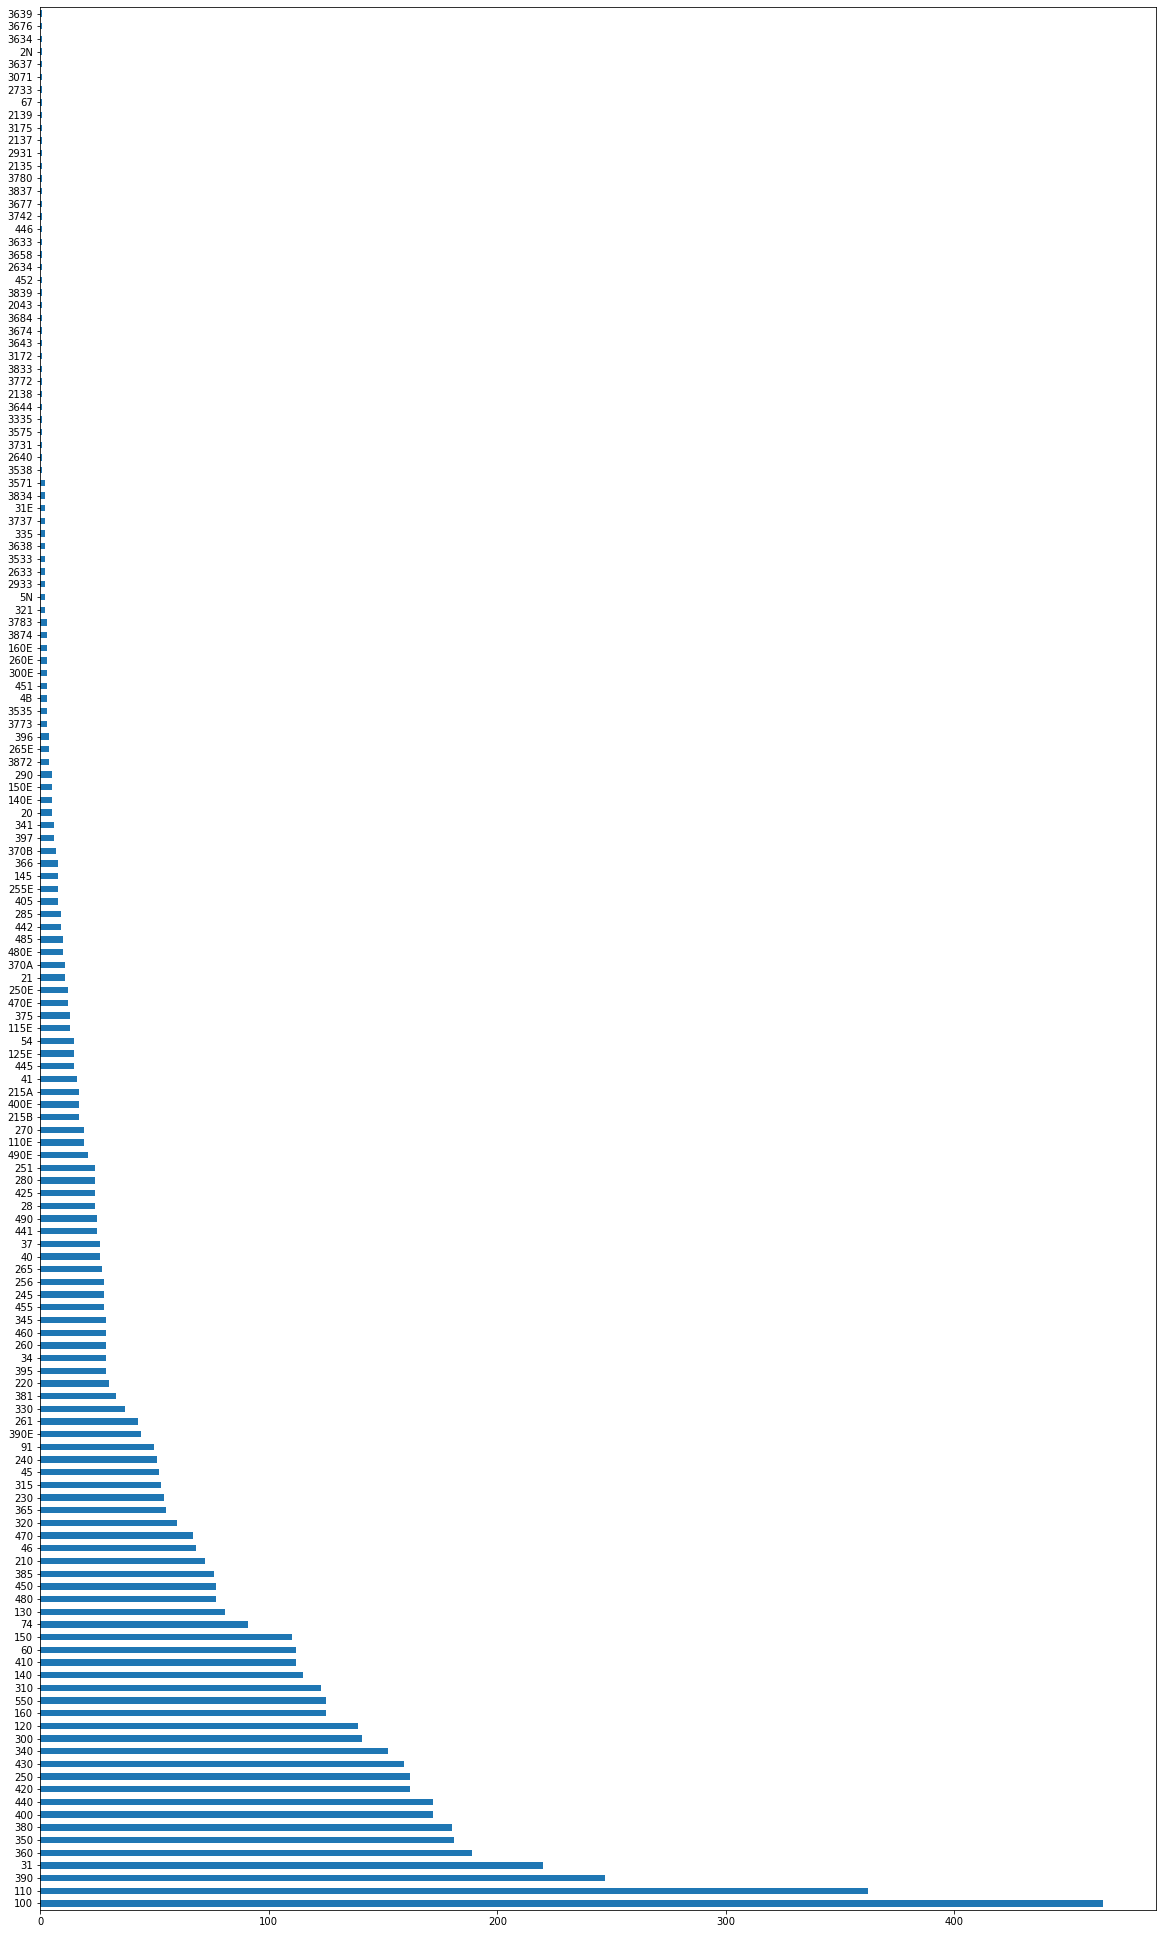

In [23]:
#Counting unique instances of 'Linjenavn' and storing it in a variable n 
n = len(pd.unique(df['Linjenavn']))
#Creating a table based on 'Linjenavn' from the original import of the csv file, and triming it to be readable
df['Linjenavn'].value_counts().head(n).plot(kind='barh',figsize=(20,35))

<AxesSubplot:>

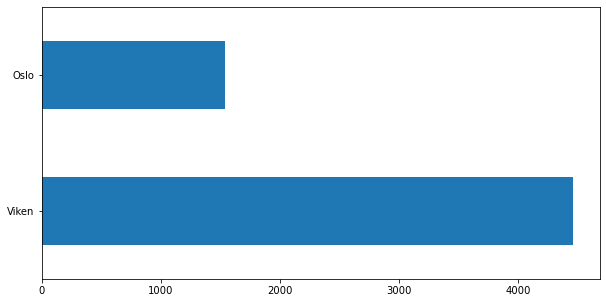

In [24]:
df['Fylke'].value_counts().head().plot(kind='barh',figsize=(10,5))

<AxesSubplot:>

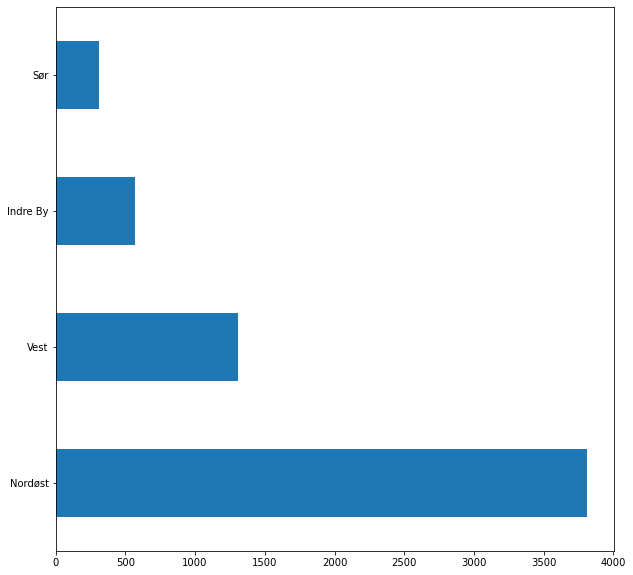

In [25]:
df['Område'].value_counts().head().plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

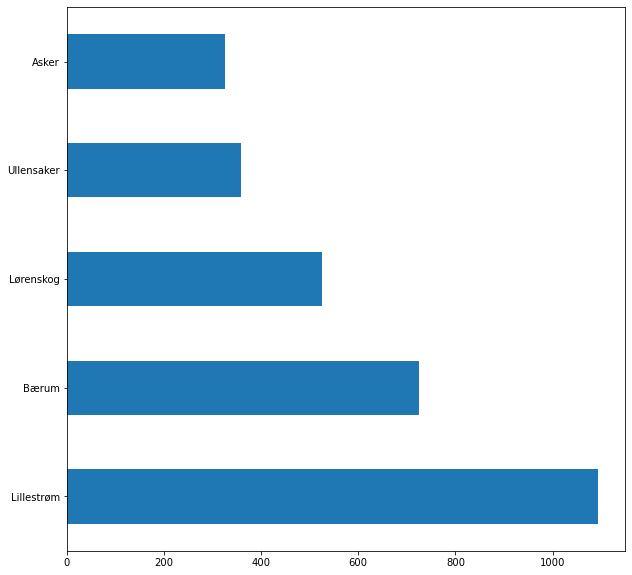

In [26]:
df['Kommune'].value_counts().head().plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

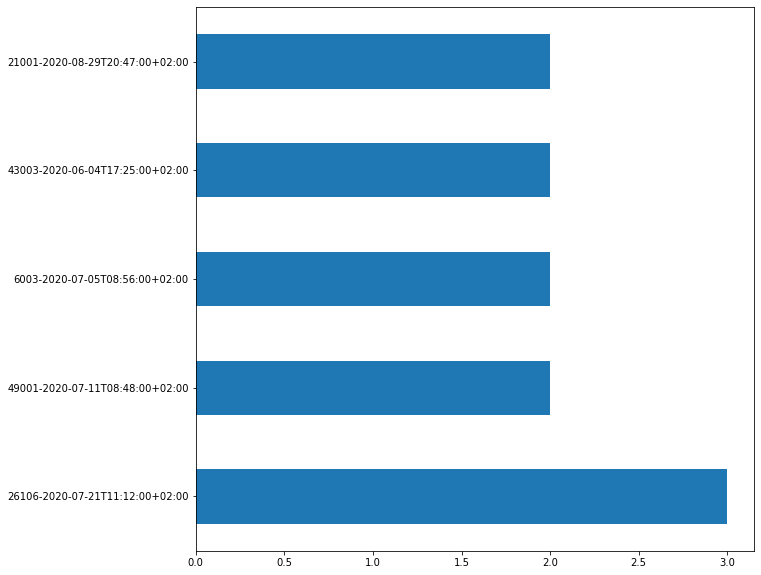

In [27]:
df['TurId'].value_counts().head().plot(kind='barh',figsize=(10,10))